In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logged emotion data
csv_file = "emotion_log.csv"  
df = pd.read_csv(csv_file)

# Convert "Timestamp" to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Set "Timestamp" as the index
df.set_index("Timestamp", inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'emotion_log.csv'

In [ ]:
resampled_data = df.groupby([pd.Grouper(freq="10S"), "Emotion"]).size().unstack().fillna(0)

# Apply moving average smoothing
resampled_data = resampled_data.rolling(window=3, min_periods=1).mean()


C:\Users\hsueh\AppData\Local\Temp\ipykernel_20140\3819336115.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data = df.groupby([pd.Grouper(freq="10S"), "Emotion"]).size().unstack().fillna(0)


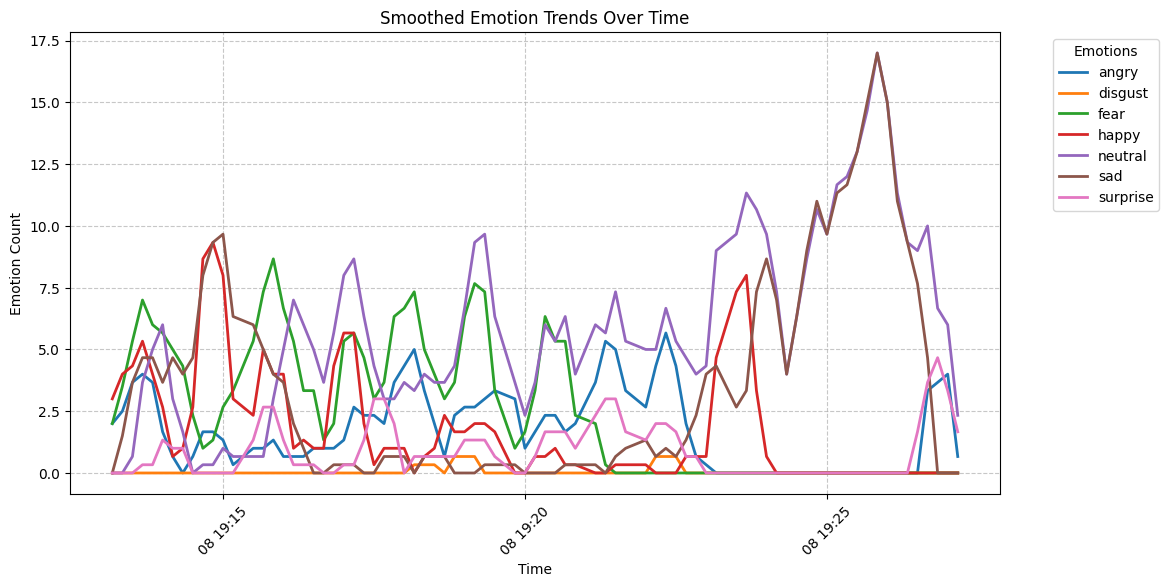

In [ ]:
plt.figure(figsize=(12, 6))

# Plot each emotion with smoothed lines
for emotion in resampled_data.columns:
    plt.plot(resampled_data.index, resampled_data[emotion], label=emotion, linewidth=2, linestyle='-')

# Customize the chart
plt.xlabel("Time")
plt.ylabel("Emotion Count")
plt.title("Smoothed Emotion Trends Over Time")
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.7)  # Softer grid lines

# Show the plot
plt.show()


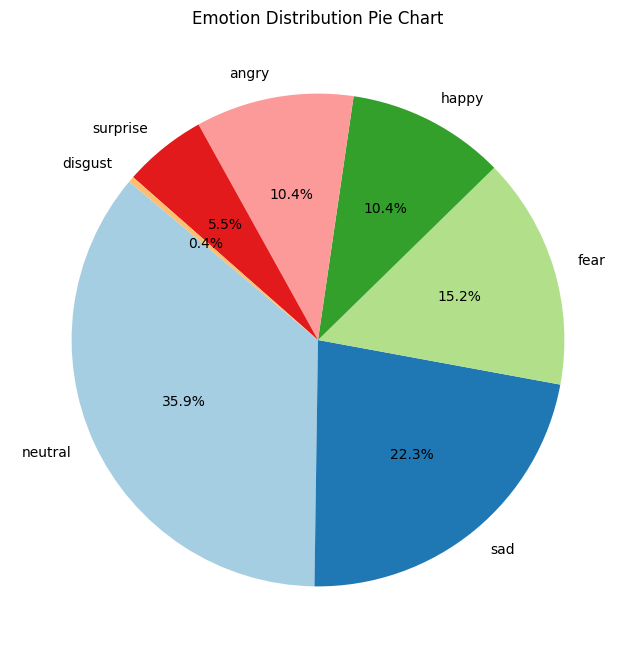

In [ ]:
# Count occurrences of each emotion
emotion_counts = df["Emotion"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Customize the chart
plt.title("Emotion Distribution Pie Chart")

# Show the pie chart
plt.show()